In [ ]:
import pandas as pd
import numpy as np
import time
import pickle
import gzip
# from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


* Link drive: https://drive.google.com/drive/folders/1Vp1GzyOELTI0Wo75eKj4BftGDl-5usxH?usp=sharing
* Link Báo cáo: https://studenthcmusedu-my.sharepoint.com/:w:/r/personal/1712615_student_hcmus_edu_vn/_layouts/15/Doc.aspx?sourcedoc=%7B3A96D09A-DC63-458F-B757-F83D5BD5196B%7D&file=1712615-1712616.docx&action=default&mobileredirect=true
* Link tham khảo: https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/
* Link tổng hợp lý thuyết: https://drive.google.com/drive/folders/142rIdkNRvAhP_DEKITTbHjew-xZc9bQO?fbclid=IwAR0AMqUVMzlpCQKTFPQbjA5BAxd48LjV6uMxg6CYC4lWsvVQk8xwtDPiImU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
root = "/content/drive/My Drive/MNIST SVM/FinalProject/"  # path  
root_image = "/content/drive/My Drive/MNIST SVM/FinalProject/image/"
root_model = "/content/drive/My Drive/MNIST SVM/FinalProject/model/"

In [ ]:
def read_mnist(mnist_file): # đọc file lấy từ file hướng dẫn của thầy 
    """
    Reads MNIST data.
    
    Parameters
    ----------
    mnist_file : string
        The name of the MNIST file (e.g., 'mnist.pkl.gz').
    
    Returns
    -------
    (train_X, train_Y, val_X, val_Y, test_X, test_Y) : tuple
        train_X : numpy array, shape (N=50000, d=784)
            Input vectors of the training set.
        train_Y: numpy array, shape (N=50000)
            Outputs of the training set.
        val_X : numpy array, shape (N=10000, d=784)
            Input vectors of the validation set.
        val_Y: numpy array, shape (N=10000)
            Outputs of the validation set.
        test_X : numpy array, shape (N=10000, d=784)
            Input vectors of the test set.
        test_Y: numpy array, shape (N=10000)
            Outputs of the test set.
    """
    f = gzip.open(mnist_file, 'rb')
    train_data, val_data, test_data = pickle.load(f, encoding='latin1')
    f.close()
    
    train_X, train_Y = train_data
    val_X, val_Y = val_data
    test_X, test_Y = test_data    
    
    return train_X, train_Y, val_X, val_Y, test_X, test_Y

In [ ]:
# Test
train_X, train_Y, val_X, val_Y, test_X, test_Y = read_mnist(root + 'mnist.pkl.gz')

print('train_X.shape =', train_X.shape)
print('train_Y.shape =', train_Y.shape)
print('val_X.shape   =', val_X.shape)
print('val_Y.shape   =', val_Y.shape)
print('test_X.shape  =', test_X.shape)
print('test_Y.shape  =', test_Y.shape)

print('\ntrain_X: min = %.3f, max = %.3f' %(train_X.min(), train_X.max()))
print('train_Y: min = %d, max = %d' %(train_Y.min(), train_Y.max()))

train_X.shape = (50000, 784)
train_Y.shape = (50000,)
val_X.shape   = (10000, 784)
val_Y.shape   = (10000,)
test_X.shape  = (10000, 784)
test_Y.shape  = (10000,)

train_X: min = 0.000, max = 0.996
train_Y: min = 0, max = 9


# DỮ LIỆU

In [ ]:
len(train_X[1]) # độ dài 

784

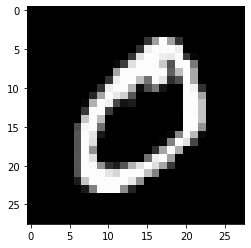

In [ ]:
image = train_X[1].reshape(28,28) # quan sát ảnh.
plt.imshow(image,cmap='gray')

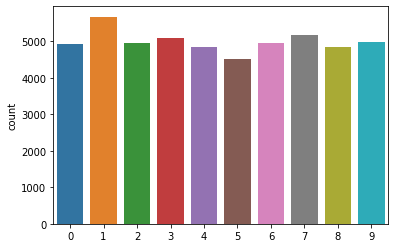

In [ ]:
sns.countplot(train_Y) # phân bố của dữ liệu training

# SVC - Kernel Linear

In [ ]:
print("Có chắc là muốn làm mới file (Note: file dữ liệu kết quả có thể bị mất): ")
sure = input()
if (sure == 1):
  df_results = pd.DataFrame(columns=["C","err_train","err_val","time"])
  df_results.to_csv(root+"Linear.csv")

Có chắc là muốn làm mới file (Note: file dữ liệu kết quả có thể bị mất): 
2


In [ ]:
def results_linear(C,train_X,train_Y,val_X,val_Y): # thực hiện lưu kết quả vào file csv khi huấn luyện với mỗi tham số bất kì
  df_results = pd.DataFrame()
  count = 0
  for c in C:
    print("C = {0}. Training ...".format(c))
    svc_linear = SVC(kernel = "linear",C=c)
    t0 = time.time()
    svc_linear.fit(train_X,train_Y) # training
    t = time.time()-t0 # thời gian thực thi tính bằng giây
    print("Thời gian thực thi: {0} (s)".format(t))
    errtrain = 1- svc_linear.score(train_X,train_Y)
    errval = 1- svc_linear.score(val_X,val_Y)
    df = pd.DataFrame([{"C":c,"err_train":errtrain,"err_val":errval,"time":t}],index = [count])
    df.to_csv(root+"Linear.csv",mode="a",header=False)
    count += 1
    df_results = pd.concat([df_results,df],axis =0)
    
  
  return df_results

In [ ]:
C = [0.001,0.01,0.1,1,10,100]
df_linear = results_linear(C,train_X,train_Y,val_X,val_Y)

C = 0.001. Training ...
Thời gian thực thi: 973.0499017238617 (s)
C = 0.01. Training ...
Thời gian thực thi: 466.177410364151 (s)
C = 0.1. Training ...
Thời gian thực thi: 342.18989634513855 (s)
C = 1. Training ...
Thời gian thực thi: 419.71564054489136 (s)
C = 10. Training ...
Thời gian thực thi: 585.9512689113617 (s)
C = 100. Training ...
Thời gian thực thi: 1401.883348941803 (s)


In [ ]:
df_linear

,C,err_train,err_val,time
0,0.001,0.07610,0.0691,973.049902
1,0.010,0.05594,0.0563,466.177410
2,0.100,0.04188,0.0519,342.189896
3,1.000,0.02754,0.0577,419.715641
4,10.000,0.01692,0.0716,585.951269
5,100.000,0.01300,0.0777,1401.883349


In [ ]:
C = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
df_linearnext = results_linear(C,train_X,train_Y,val_X,val_Y)

C = 0.1. Training ...
Thời gian thực thi: 345.5276298522949 (s)
C = 0.2. Training ...
Thời gian thực thi: 352.20339584350586 (s)
C = 0.3. Training ...
Thời gian thực thi: 363.41804671287537 (s)
C = 0.4. Training ...
Thời gian thực thi: 373.2905445098877 (s)
C = 0.5. Training ...
Thời gian thực thi: 383.64319252967834 (s)
C = 0.6. Training ...
Thời gian thực thi: 392.33940291404724 (s)
C = 0.7. Training ...
Thời gian thực thi: 399.7034423351288 (s)
C = 0.8. Training ...
Thời gian thực thi: 405.8645210266113 (s)
C = 0.9. Training ...
Thời gian thực thi: 412.83735370635986 (s)


In [ ]:
df_linearnext

,C,err_train,err_val,time
0,0.1,0.04188,0.0519,345.527630
1,0.2,0.03752,0.0537,352.203396
2,0.3,0.03508,0.0534,363.418047
3,0.4,0.03310,0.0554,373.290545
4,0.5,0.03146,0.0555,383.643193
5,0.6,0.03046,0.0556,392.339403
6,0.7,0.02946,0.0559,399.703442
7,0.8,0.02868,0.0561,405.864521
8,0.9,0.02796,0.0569,412.837354


In [ ]:
C = [0.05,0.06,0.07,0.08,0.09]
df_linearprevious = results_linear(C,train_X,train_Y,val_X,val_Y)

C = 0.05. Training ...
Thời gian thực thi: 340.93689584732056 (s)
C = 0.06. Training ...
Thời gian thực thi: 336.69879388809204 (s)
C = 0.07. Training ...
Thời gian thực thi: 334.11593985557556 (s)
C = 0.08. Training ...
Thời gian thực thi: 330.908718585968 (s)
C = 0.09. Training ...
Thời gian thực thi: 331.8046615123749 (s)


In [ ]:
df_linearprevious

,C,err_train,err_val,time
0,0.05,0.04576,0.0520,340.936896
1,0.06,0.04474,0.0527,336.698794
2,0.07,0.04368,0.0528,334.115940
3,0.08,0.04318,0.0522,330.908719
4,0.09,0.04240,0.0520,331.804662


In [ ]:
df_linearprevious.to_csv(root+"Linear2.csv",mode="a",header = False) # lưu kết quả file csv lên drive note: dữ liệu đã đc lưu trong quá trình chạy check file trước khi lưu

#SVC - Kernel Rbf

In [ ]:
df_results = pd.DataFrame(columns=["C","gamma","err_train","err_val","time"])
df_results.to_csv(root+"Rbf.csv")

In [ ]:
def results_rbf(C,gamma,train_X,train_Y,val_X,val_Y):
  df_results = pd.DataFrame()
  count = 0
  for c in C:
    for gammai in gamma:
      print("C = {0}, gamma = {1}. Training ...".format(c,gammai))
      svc_rbf = SVC(kernel = "rbf",C=c,gamma = gammai)
      t0 = time.time()
      svc_rbf.fit(train_X,train_Y) # training
      t = time.time()-t0 # thời gian thực thi tính bằng giây
      print("Thời gian thực thi: {0} (s)".format(t))
      errtrain = 1- svc_rbf.score(train_X,train_Y)
      errval = 1- svc_rbf.score(val_X,val_Y)
      df = pd.DataFrame([{"C":c,"gamma":gammai,"err_train":errtrain,"err_val":errval,"time":t}],index = [count])
      df.to_csv(root+"Rbf.csv",mode="a",header=False)
      count += 1
      df_results = pd.concat([df_results,df],axis =0)
    
  return df_results

In [ ]:
C = [0.01,0.1 ,1 , 10,100,1000]  # 0.01,0.1 ,1 , 10,100,1000
gamma = [0.001] #0.001, 0.005,0.01,0.05,0.1
df_rbf = results_rbf(C,gamma,train_X,train_Y,val_X,val_Y)

C = 0.01, gamma = 0.001. Training ...
Thời gian thực thi: 5184.971562623978s
C = 0.1, gamma = 0.001. Training ...
Thời gian thực thi: 1979.82177734375s
C = 1, gamma = 0.001. Training ...
Thời gian thực thi: 766.9814963340759s
C = 10, gamma = 0.001. Training ...
Thời gian thực thi: 395.3813986778259s
C = 100, gamma = 0.001. Training ...
Thời gian thực thi: 315.4152591228485s
C = 1000, gamma = 0.001. Training ...
Thời gian thực thi: 314.1558380126953s


In [ ]:
df_rbf.head(5)

,C,gamma,err_train,err_val,time
0,0.01,0.001,0.25374,0.2279,5184.971563
1,0.01,0.005,0.11450,0.1016,3184.272387
2,0.01,0.010,0.09390,0.0822,2777.816640
3,0.01,0.050,0.19026,0.1713,4801.993683
4,0.01,0.100,0.78430,0.7828,5307.656332


In [ ]:
df_rbf.to_csv(root+"Rbf.csv") # lưu kết quả file csv lên drive

# Đánh giá

####Tiền Xử lý kết quả

In [ ]:
df1 = pd.read_csv(root+"Linear.csv",index_col= 0 ) # đọc file kết quả Linear
df2 = df1.astype({"C":'str'})

In [ ]:
df1 = df1.sort_values(["C"])
df1.reset_index(inplace = True, drop = True) 

In [ ]:
df1.to_csv(root+"results_linear.csv")  # results_linear.csv

In [ ]:
df_rbf = pd.read_csv(root+"Rbf.csv",index_col= 0 )

In [ ]:
df_rbf = df_rbf.sort_values(["C","gamma"])
df_rbf.reset_index(inplace = True, drop = True) 

In [ ]:
df_rbf.to_csv(root+"results_rbf.csv")

#### Trực quan kết quả

In [ ]:
df = pd.read_csv(root+"results_linear.csv",index_col=0)
df_ln = df.iloc[[0,1,10,19,20,21],:].astype({"C":"str"})
df_ln

,C,err_train,err_val,time
0,0.001,0.07610,0.0691,973.049902
1,0.01,0.05594,0.0563,466.177410
10,0.1,0.04188,0.0519,342.189896
19,1.0,0.02754,0.0577,419.715641
20,10.0,0.01692,0.0716,585.951269
21,100.0,0.01300,0.0777,1401.883349


In [ ]:
def plotbar_err(x,y,title):
  
  fig,ax = plt.subplots(1,figsize=(10,8),dpi=100)
  ax.set_title(title,fontsize=18)
  plt.xlabel('C')
  plt.ylabel('Error')
  ax.bar(x,y)
  

def plotline_err(x,y,title):

  plt.figure(1, figsize=(10, 8), dpi=100)
  plt.title(title,fontsize=18)
  plt.xlabel("C")
  plt.ylabel("Error")
  plt.plot(x,y,"r")
  
  

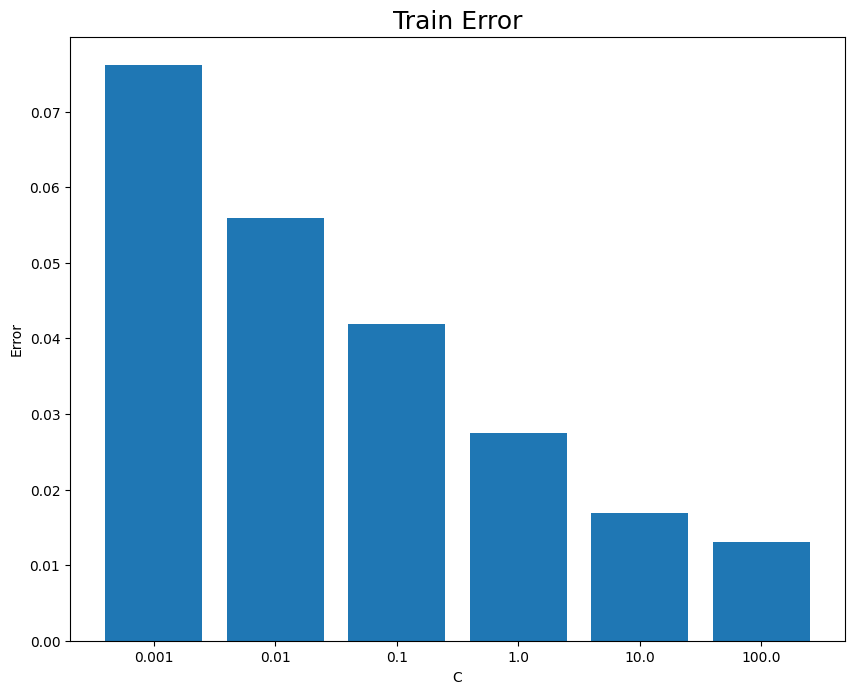

In [ ]:
plotbar_err(df_ln.C,df_ln.err_train,"Train Error")
plt.savefig(root_image+"train_linear.jpg",dpi = 1000)

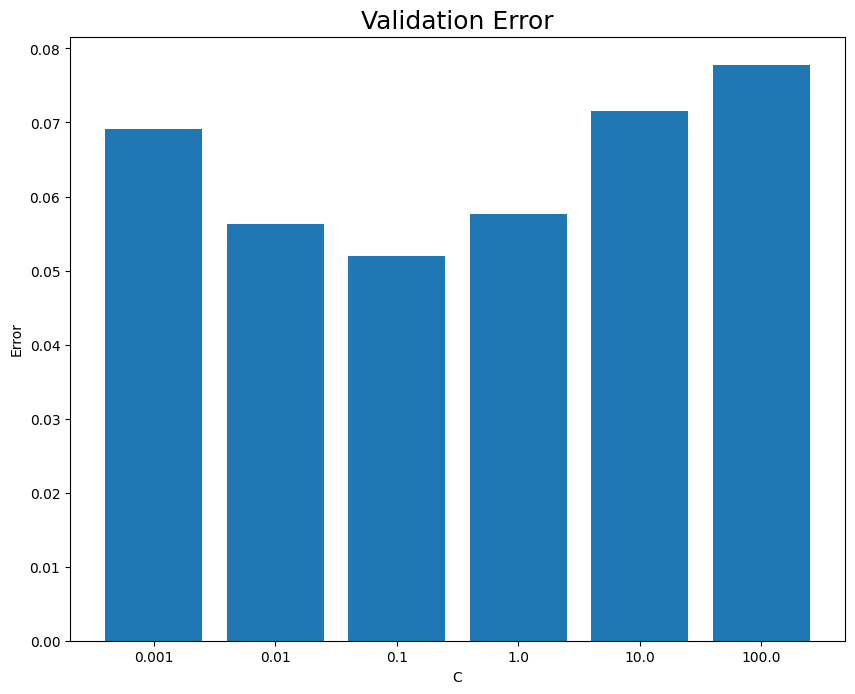

In [ ]:
plotbar_err(df_ln.C,df_ln.err_val,"Validation Error")
plt.savefig(root_image+"val_linear.jpg",dpi = 1000)

In [ ]:
df_next = df[(df.C > 0.01) & (df.C < 1)]

In [ ]:
df.time= df.time / 60

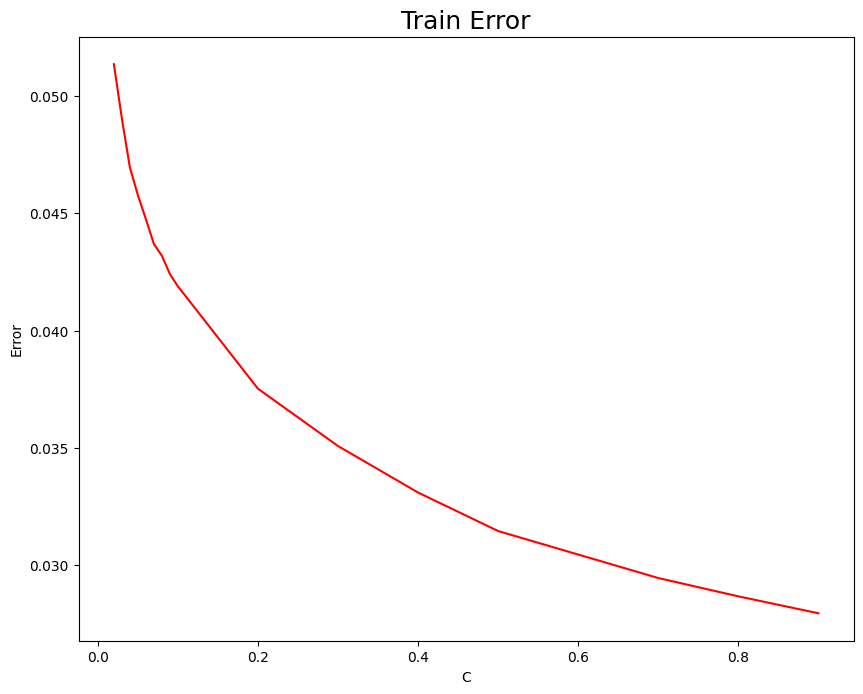

In [ ]:
plotline_err(df_next.C,df_next.err_train,"Train Error")
plt.savefig(root_image+"train_linearnext.jpg",dpi = 1000)

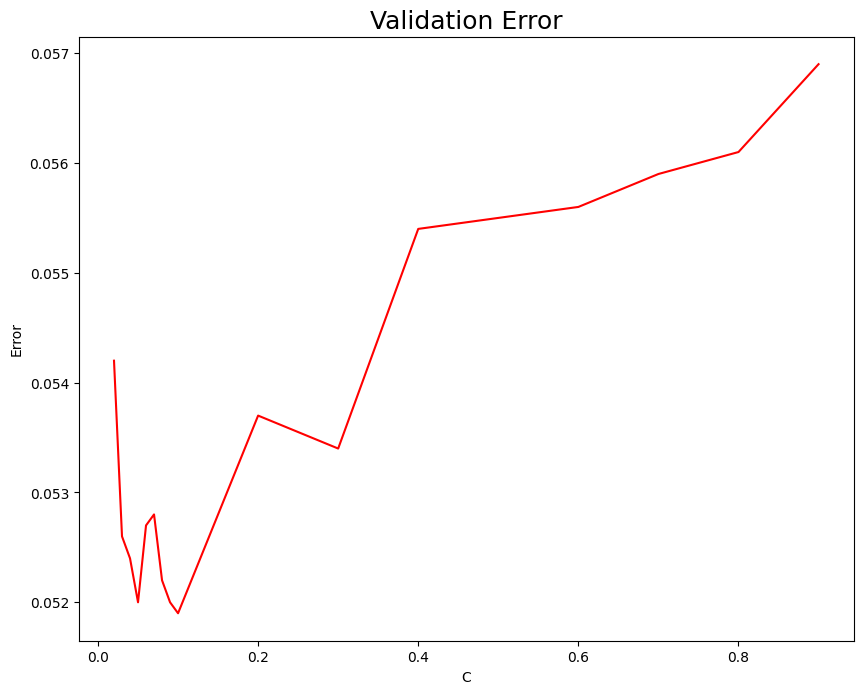

In [ ]:
plotline_err(df_next.C,df_next.err_val,"Validation Error")
plt.savefig(root_image+"val_linearnext.jpg",dpi = 1000)

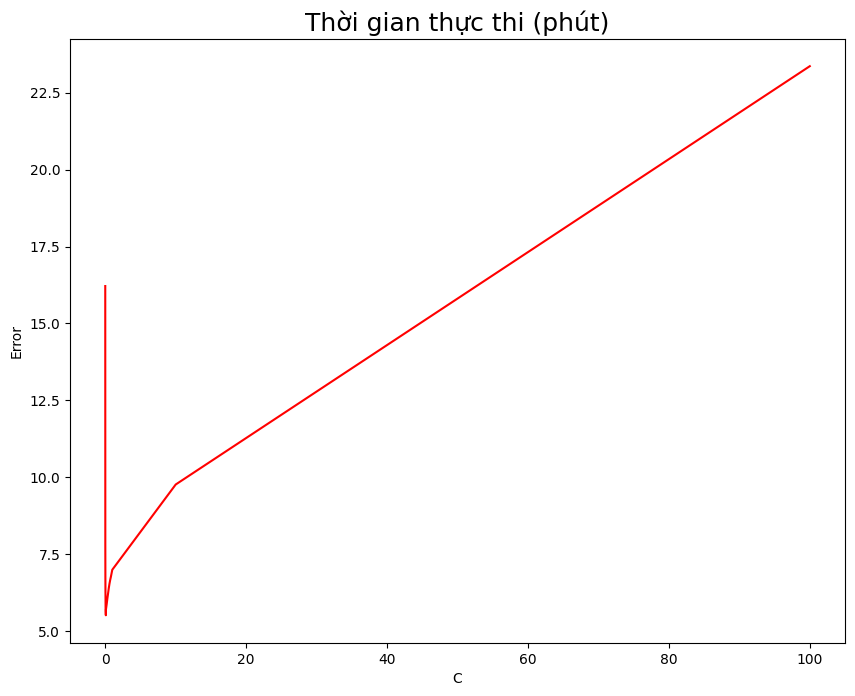

In [ ]:
plotline_err(df.C,df.time,"Thời gian thực thi (phút)")
plt.savefig(root_image+"time_linear.jpg",dpi = 1000)

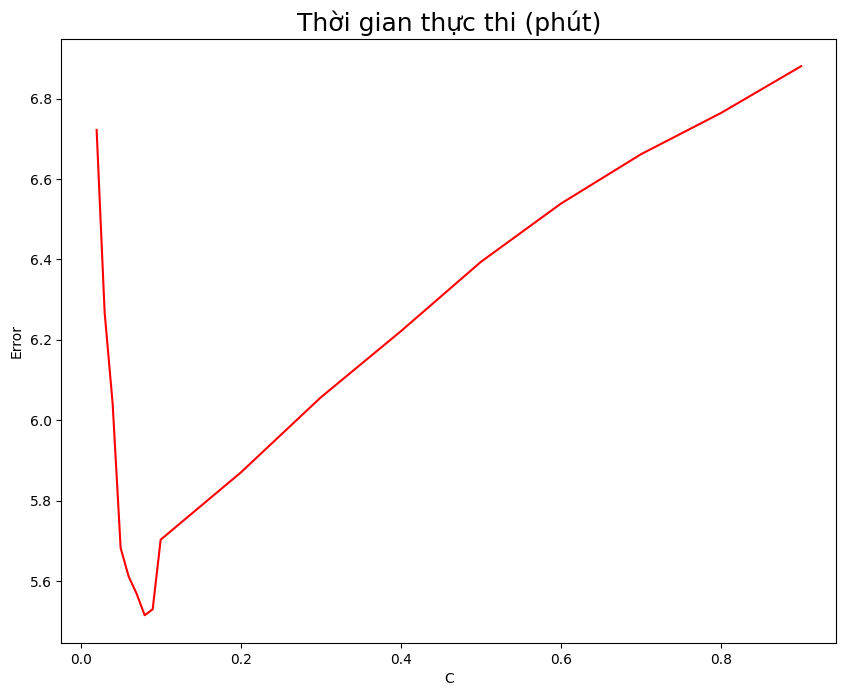

In [ ]:
plotline_err(df_next.C,df_next.time,"Thời gian thực thi (phút)")
plt.savefig(root_image+"time_linearnext.jpg",dpi = 1000)

In [ ]:
df = df[["C","err_train","err_val"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   C          22 non-null     float64
 1   err_train  22 non-null     float64
 2   err_val    22 non-null     float64
dtypes: float64(3)
memory usage: 704.0 bytes


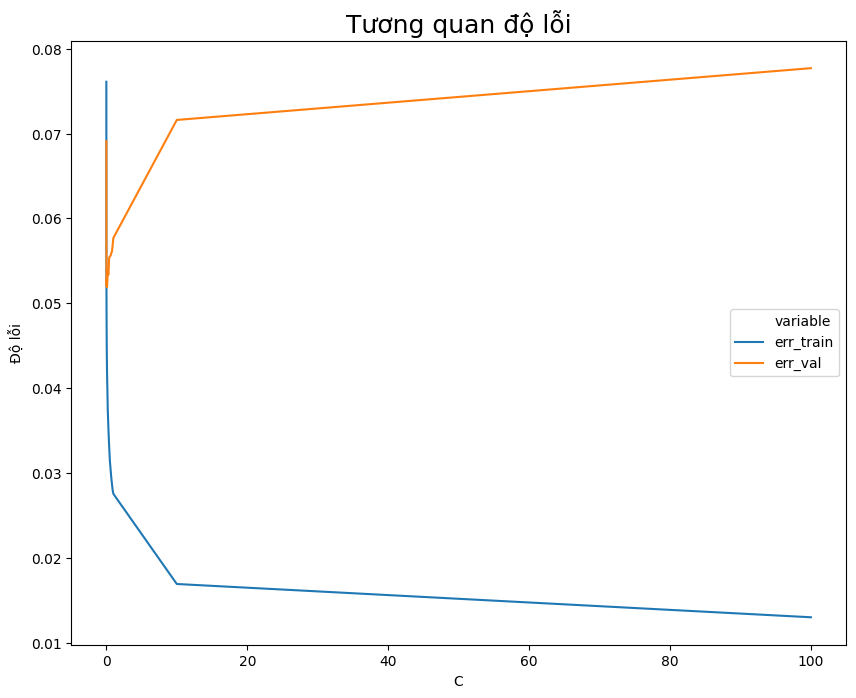

In [ ]:
plt.figure(1, figsize=(10, 8), dpi=100)
sns.lineplot(x='C', y='value', hue='variable', data=pd.melt(df, ['C']))
plt.ylabel("Độ lỗi")
plt.title("Tương quan độ lỗi",fontsize=18)
plt.savefig(root_image+"trainval_linear.jpg",dpi = 1000)

#### Rbf

In [ ]:
df_rbf = pd.read_csv(root+"results_rbf.csv",index_col=0)

In [ ]:
matrix = pd.pivot_table(df_rbf, values="err_val",index=["C"], columns=["gamma"], fill_value=0)
matrix # https://stackoverflow.com/questions/43330205/heatmap-from-columns-in-pandas-dataframe

gamma,0.001,0.005,0.010,0.050,0.100
C,,,,,
0.01,0.2279,0.1016,0.0822,0.1713,0.7828
0.10,0.0861,0.0561,0.0422,0.0347,0.3125
1.00,0.0589,0.0318,0.0223,0.0179,0.0448
10.00,0.0408,0.0197,0.0165,0.0167,0.0434
100.00,0.0282,0.0197,0.0168,0.0167,0.0434
1000.00,0.0285,0.0199,0.0168,0.0167,0.0434


In [ ]:
def plot_heatmap(cm,title='Validation error', cmap=plt.cm.hot):
  plt.figure(1, figsize=(10, 8), dpi=90)
  sns.heatmap(cm,cmap=cmap,annot=True, fmt=".4f")
  plt.title(title,fontsize =18)
  plt.yticks(rotation=0)
  # plt.show()

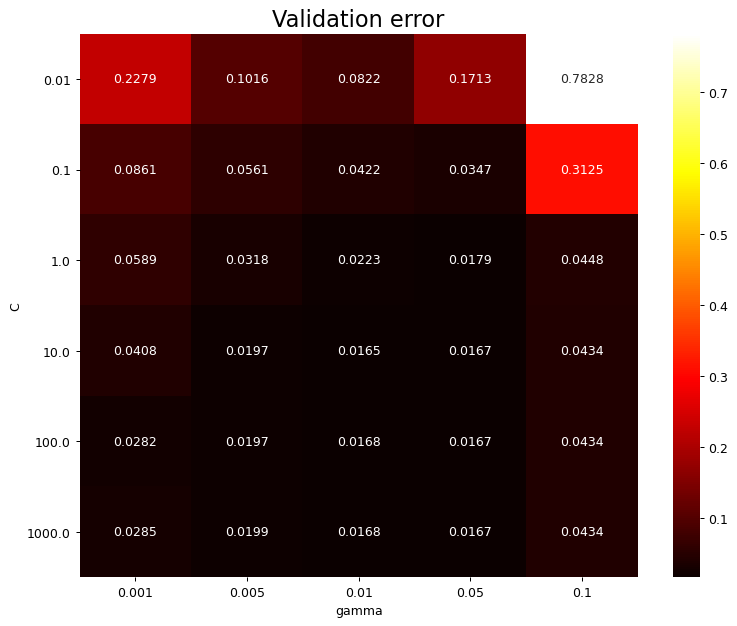

In [ ]:
plot_heatmap(matrix)
plt.savefig(root_image+"val_rbf.jpg",dpi = 1000)

In [ ]:
matrix_train = pd.pivot_table(df_rbf, values="err_train",index=["C"], columns=["gamma"], fill_value=0)
matrix_train 

gamma,0.001,0.005,0.010,0.050,0.100
C,,,,,
0.01,0.25374,0.11450,0.09390,0.19026,0.78430
0.10,0.09824,0.06320,0.04702,0.03188,0.28952
1.00,0.06422,0.02946,0.01526,0.00084,0.00004
10.00,0.03794,0.00444,0.00058,0.00000,0.00000
100.00,0.00942,0.00000,0.00000,0.00000,0.00000
1000.00,0.00008,0.00000,0.00000,0.00000,0.00000


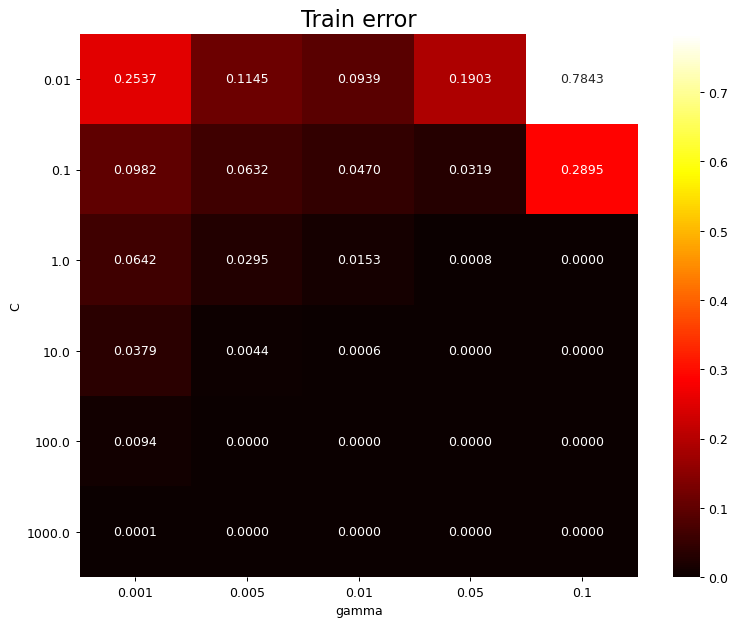

In [ ]:
plot_heatmap(matrix_train,"Train error")
plt.savefig(root_image+"train_rbf.jpg",dpi = 1000)

In [ ]:
df_rbf["time"] = df_rbf["time"] / 3600 # chuyển đổi thời gian (s) sang giờ
df_rbf

In [ ]:
matrix_time = pd.pivot_table(df_rbf, values="time",index=["C"], columns=["gamma"], fill_value=0)
matrix_time

gamma,0.001,0.005,0.010,0.050,0.100
C,,,,,
0.01,1.440270,0.884520,0.771616,1.333887,1.474349
0.10,0.549950,0.313914,0.267120,0.552083,1.183676
1.00,0.213050,0.131721,0.117912,0.398514,2.033058
10.00,0.109828,0.085534,0.098638,0.384624,2.097461
100.00,0.087615,0.083376,0.098529,0.339753,2.089993
1000.00,0.087266,0.083557,0.098289,0.339437,2.096430


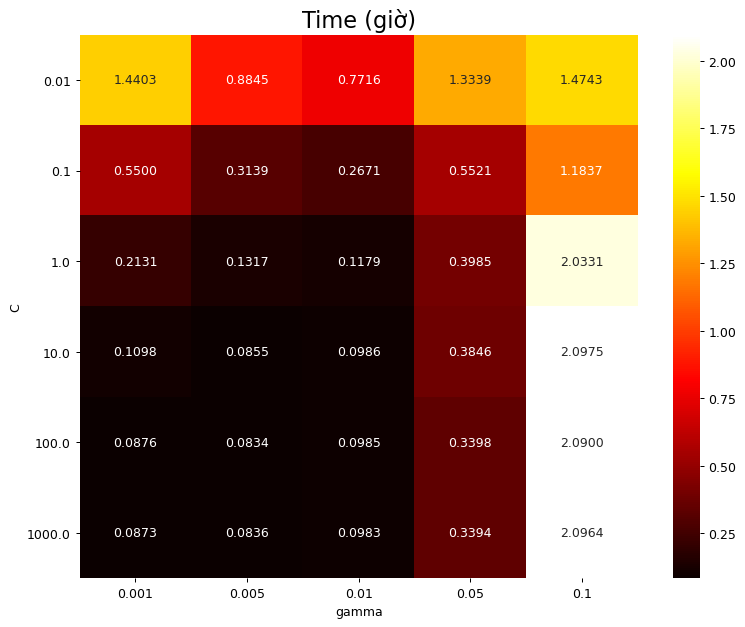

In [ ]:
plot_heatmap(matrix_time,"Time (giờ)")
plt.savefig(root_image+"time_rbf.jpg",dpi = 1000)

# Kết quả

Training với tham số tốt nhất chọn được

In [ ]:
svc_rbf = SVC(kernel = "rbf",C=10,gamma = 0.01)
t0 = time.time()
svc_rbf.fit(train_X,train_Y) # training
t = time.time()-t0
print("Thực thi: ",t)

Thực thi:  346.91731214523315


In [ ]:
svc_rbf.score(val_X,val_Y)

0.9835

In [ ]:
svc_linear = SVC(kernel = "linear",C=0.1)
t0 = time.time()
svc_linear.fit(train_X,train_Y) # training
t = time.time()-t0
print("Thời gian thực thi: {0} (s): ".format(t))

Thời gian thực thi: 343.0964481830597 (s): 


In [ ]:
svc_linear.score(val_X,val_Y)

0.9481

Save & Load model

In [ ]:
from joblib import dump, load
dump(svc_linear, root+'svm_linear.joblib') 

['/content/drive/My Drive/MNIST SVM/FinalProject/svm_linear.joblib']

In [ ]:
dump(svc_rbf, root+'svm_rbf.joblib') 

['/content/drive/My Drive/MNIST SVM/FinalProject/svm_rbf.joblib']

In [ ]:
clf = load(root_model + 'svm_linear.joblib') 

Độ chính xác tập test

In [ ]:
from sklearn.metrics import plot_confusion_matrix
accuracy_linear = svc_linear.score(test_X,test_Y)


In [ ]:
accuracy_rbf = svc_rbf.score(test_X,test_Y)

In [ ]:
def plot_matrix_confusion(model,text_X,text_Y,cmap="Blues",values_format="d",savename= 0,accuracy=0):

  fig,ax = plt.subplots(1,figsize=(10,8),dpi=100)
  plot_confusion_matrix(model, test_X, test_Y, cmap=cmap,values_format=values_format,ax =ax)
  ax.set_title('Confusion matrix')
  plt.xlabel('Predicted label\nAccuracy = {:0.4f} ; Error = {:0.4f}'.format(accuracy, 1- accuracy))
  if (savename != 0):
    plt.savefig(root_image+savename,dpi=1000)

  plt.show()
  
  
root_image = "/content/drive/My Drive/MNIST SVM/FinalProject/image/"

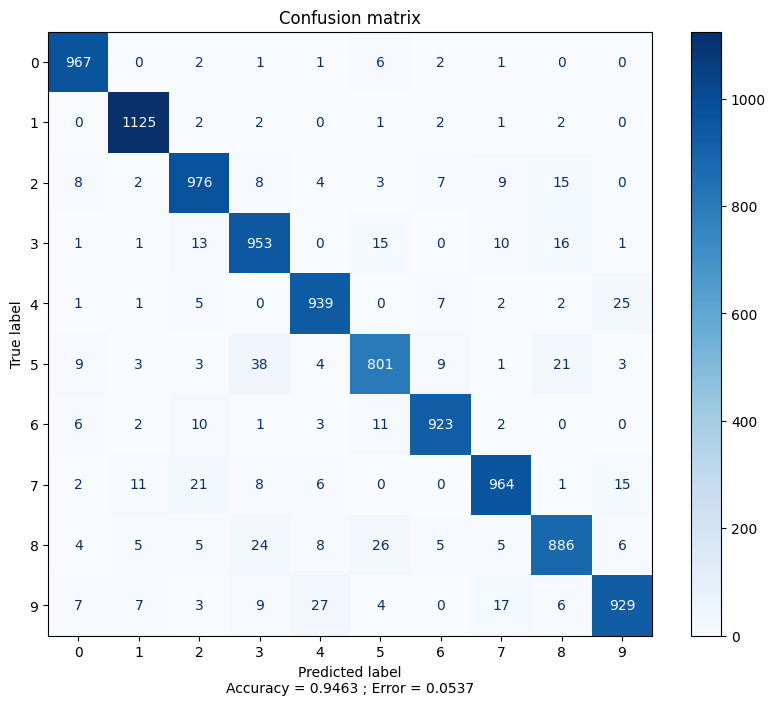

In [ ]:
plot_matrix_confusion(svc_linear, test_X, test_Y,savename = "confusion_linear.jpg",accuracy=accuracy_linear)


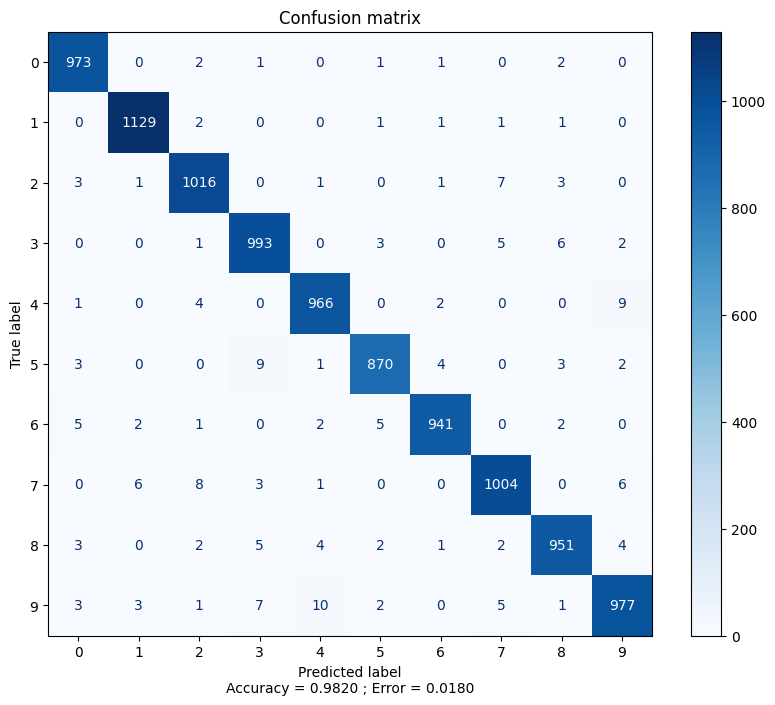

In [ ]:
plot_matrix_confusion(svc_rbf, test_X, test_Y,savename = "confusion_rbf.jpg",accuracy=accuracy_rbf)


# Tài liệu tham khảo
* https://matplotlib.org/3.1.3/tutorials/colors/colormaps.html
* https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html